In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift

def col(x):
    return np.array(np.matrix(x)).T

# Punto 1

### Considere el siguiente proceso estocástico conocido como ruido blanco en tiempo discreto $\forall n,r \in \mathbb{N}$:
### $$\{X[n]\}_{n=0}^{\infty}$$
### $$E[X[n]] = 0$$
### $$\text{var}(X[n]) = \sigma^2$$
### $$\text{cov}(X[n], X[r]) = 0$$
### Este proceso estocástico es muy utilizado para modelar incertidumbre en mediciones. Asuma también que $X[n]$ y $X[r]$ son independientes para todo $n, r \in \mathbb{N}$.

## a) Encuentre la caracterización de segundo orden de este proceso estocástico.

Se sabe que la caracterización de segundo orden de un proceso estocástico en tiempo discreto está completamente definida por su **media** $\mu_X[n]$ y su **función de autocorrelación** $R_X[n,r]$. Se procede a encontrar cada uno de estos componentes.

Para hallar la media, se sabe que
$$\mu_X[n] = E[X[n]]$$
y por definición, sabemos que
$$E[X[n]] = 0$$
por lo tanto,
$$\mu_X[n] = 0$$

Para hallar la función de autocorrelación, se sabe que, por definición, esta está dada por
$$R_X[n,r] = E[X[n]X[r]]$$
Como sabemos que las variables aleatorias $X[n]$ y $X[r]$ son independientes para todo $n, r \in \mathbb{N}$, entonces
$$R_X[n,r] = E[X[n]X[r]] = E[X[n]]E[X[r]]$$
Como ya vimos que $E[X[n]] = 0$, lo que además también implica que $E[X[r]] = 0$,
$$R_X[n,r] = 0$$
para todo $n \neq r$. Sin embargo, cuando $n=r$ se tiene que
$$R_X[n,r] = E[X[n]X[n]] = E[X[n]^2]$$
La pregunta es ahora, ¿cuánto vale $E[X[n]^2]$?
Sabemos que la varianza de $X[n]$ está dada por
$$\text{var}(X[n]) = E[X[n]^2] - \left(E[X[n]]\right)^2$$
Pero como $E[X[n]] = 0$,
$$\text{var}(X[n]) = E[X[n]^2] = \sigma^2$$
Por lo tanto, se puede afirmar que

$$\begin{equation*}
R_X[n,r] = \left\{
        \begin{array}{ll}
            0 & \quad n \neq r \\
            \sigma^2 & \quad n = r
        \end{array}
    \right.
\end{equation*} $$

## b) Ahora asuma que $X[n]$ es una variable aleatoria continua que sigue una distribución Gaussiana (el proceso estocástico es en tiempo discreto, pero las variables aleatorias son continuas). Sea $Z_{n,r} = [X[n],X[r]]^\intercal$ . Encuentre la PDF del vector aleatorio $Z_{n,r}$, y claramente especifique cuál es el vector de valores esperados y la matriz de covarianza.

La PDF del vector aleatorio $Z_{n,r}$ está dada por

$$f_Z(z) = \frac{1}{2\pi\sqrt{\det{C_Z}}}\exp\left(-\frac{1}{2}(z-\mu_Z)^\intercal C_Z^{-1} (z-\mu_Z)\right)$$
donde
$$\mu_Z = \begin{bmatrix} \mu_X[n] \\ \mu_X[r] \end{bmatrix} = \begin{bmatrix} E[X[n]] \\ E[X[r]] \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$$
$$C_z = \begin{bmatrix} \sigma^2 & \text{cov}(X[n], X[r]) \\ \text{cov}(X[n], X[r]) & \sigma^2 \end{bmatrix} = \begin{bmatrix} \sigma^2 & 0 \\ 0 & \sigma^2 \end{bmatrix}$$

## c) Simule una realización del proceso estocástico $\{X[n]\}$ para valores de $n$ desde 0 hasta 1000, asumiendo que $\sigma^2 = 4$ y que $X[n]$ es Gaussiana para todo $n$. Grafíquelo y analícelo.

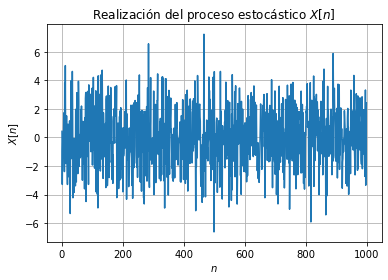

In [2]:
# Vector de tiempo
n = np.arange(0, 1000)

# Se crean muestras de una variable aleatoria normal con media 0 y varianza 4 (desviación estándar 2).
normal = np.random.normal(0, 2, len(n))

plt.plot(n, normal)
plt.title('Realización del proceso estocástico $X[n]$')
plt.xlabel('$n$')
plt.ylabel('$X[n]$')
plt.grid()
plt.savefig('realizacion.eps', format='eps')

Se puede notar que el proceso estocástico está centrado alrededor de 0, tal como lo indica su media, y para cada $n$ en el eje de tiempo, el valor de la realización varía en valores alrededor del 4 indicado por su varianza.

## d) Para la realización del proceso estocástico en el enunciado c) calcule el contenido frecuencial a través de la magnitud de la transformada de Fourier (TF). Pueden utilizar la función adjunta ```espectro.m```.

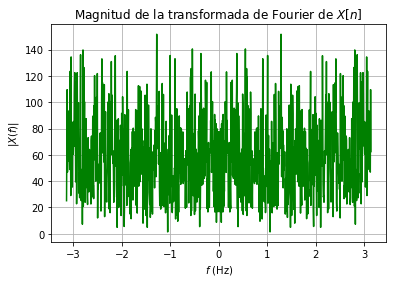

In [3]:
# Calculamos la transformada de Fourier de la señal encontrada en el literal anterior.

# Función para encontrar la transformada de Fourier de una señal.
def espectro(x):

    # Longitud del vector x
    N = len(x)

    # Se obtiene la transformada de Fourier
    fourierX = fft(x)

    # Adecuación del espectro generado (corrimiento e inversión)
    fourierX2 = fftshift(fourierX)

    # Magnitud de la transformada de Fourier
    mag = np.abs(fourierX2)

    # Generar vector de frecuencia en hertz (intervalo [-pi,pi])
    frec = np.linspace(-np.pi, np.pi, N)
    
    return mag, frec

mag, f1 = espectro(normal)

# Gráfica
plt.plot(f1, mag, color='g')
plt.grid()
plt.xlabel('$f$ (Hz)')
plt.ylabel('|$X(f)$|')
plt.title("Magnitud de la transformada de Fourier de $X[n]$")
plt.savefig('fourier.eps', format='eps')

## e) Genere otras 9999 realizaciones del proceso estocástico en el enunciado c), y calcule la magnitud de la TF para cada una, de la misma forma como lo hizo en d). Grafique el promedio de todas las TF para cada instante de frecuencia (es decir, magnitud vs frecuencia). Analice los resultados con el hecho de que el proceso estocástico se denomina ruido blanco.

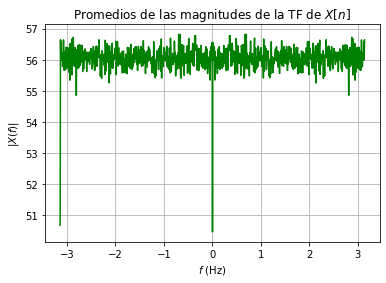

In [4]:
# Creamos una matriz donde guardaremos todas las realizaciones del proceso estocástico
realizaciones = np.zeros((len(n), 10000))
n1, m1 = np.shape(realizaciones)

# Se guarda la realización encontrada en literales anteriores en la primera columna de la matriz.
realizaciones[:, 0] = normal 

# Creamos cada realización del proceso estocástico y se lo asginamos a cada columna de la matriz de realizaciones.
# Cada columna de la matriz corresponde a una realización del proceso estocástico con media 0 y varianza 4 (desviación estándar 2).
for j in range(1, m1):
    realizaciones[:, j] = np.random.normal(0, 2, len(n))

# Se crea una matriz de magnitudes en las que se guardará la magnitud de la transformada de Fourier de cada realización. 
magnitudes = np.zeros((len(n), m1))

# A cada realización se le encuentra la transformada de Fourier, y se guarda la magnitud de cada realización en cada columna de la matriz de magnitudes.
for i in range(m1):
    X = realizaciones[:, i]
    magnitud, frecuencia = espectro(X)
    magnitudes[:,i] = magnitud

# Se crea una lista de promedios
promedios = []

# Para cada fila de la matriz de magnitudes, que representa el valor de cada TF de cada realización para un valor específico de frecuencia,
# se encuentra el promedio. Este promedio se guarda en la lista de promedios, para al final obtener el promedio de cada una de las transformadas
# en un solo vector.
for i in range(np.shape(magnitudes)[0]):
    promedio = np.average(magnitudes[i])
    promedios.append(promedio)

# Se grafica el vector de promedios contra la frecuencia.
plt.plot(frecuencia, promedios, color='g')
plt.xlabel('$f$ (Hz)')
plt.ylabel('|$X(f)$|')
plt.title("Promedios de las magnitudes de la TF de $X[n]$")
plt.grid()
plt.savefig('fourierpromedio.eps', format='eps')

Se puede notar que el contenido frecuencial de esta señal muestra que no hay una prevalencia de unas frecuencias sobre otras, sino que es una señal cuyo contenido frecuencial abarca todas las frecuencias. Por esta razón se denomina ruido **blanco**, pues la señal contiene todas las frecuencias del espectro.